# Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
from datetime import datetime

#Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Data Loading and Sanity Check

In [5]:
df=pd.read_csv('./players.csv',usecols=['S.NO','Name','Nationality','Current Rank','Previous Year Rank','Sport','Year','earnings ($ million)'])

In [6]:
df['earnings']=df['earnings ($ million)']

In [8]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0,9.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 9 columns):
S.NO                    291 non-null int64
Name                    291 non-null object
Nationality             291 non-null object
Current Rank            291 non-null int64
Previous Year Rank      267 non-null object
Sport                   291 non-null object
Year                    291 non-null int64
earnings ($ million)    291 non-null float64
earnings                291 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 20.5+ KB


In [10]:
for var in df:
    print(var,df[var].unique()[0:20],'\n')

S.NO [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Name ['Mike Tyson' 'Buster Douglas' 'Sugar Ray Leonard' 'Ayrton Senna'
 'Alain Prost' 'Jack Nicklaus' 'Greg Norman' 'Michael Jordan'
 'Arnold Palmer' 'Evander Holyfield' 'George Foreman'
 'Donovan "Razor" Ruddock' 'Nigel Mansell' 'Andre Agassi' 'Joe Montana'
 'Jim Courier' 'Monica Seles' 'Riddick Bowe' "Shaquille O'Neal"
 'Lennox Lewis'] 

Nationality ['USA' 'Brazil' 'France' 'Australia' 'Canada' 'UK' 'Austria' 'Germany'
 'Russia' 'Italy' 'Finland' 'Switzerland' 'Philippines' 'Portugal'
 'Dominican' 'Argentina' 'Filipino' 'Spain' 'Serbia' 'Northern Ireland'] 

Current Rank [ 1  2  3  4  5  6  7  8  9 10] 

Previous Year Rank [nan '8' '1' '>30' '4' '5' '12' '6' '3' '9' '17' '13' '10' '>40' '19' '40'
 '7' '11' '30' '22'] 

Sport ['boxing' 'auto racing' 'golf' 'basketball' 'Basketball' 'Boxing'
 'Auto Racing' 'Golf' 'Tennis' 'NFL' 'Auto racing' 'NBA' 'Baseball'
 'Ice Hockey' 'American Football / Baseball' 'tennis' 'ice h

Sanity check for repeated sports categories, uniformity

In [11]:
df['Sport']=df['Sport'].replace('boxing','Boxing')
df['Sport']=df['Sport'].replace('basketball','Basketball')
df['Sport']=df['Sport'].replace('NBA','Basketball')
df['Sport']=df['Sport'].replace('auto racing','Auto racing')
df['Sport']=df['Sport'].replace('Auto Racing','Auto racing')
df['Sport']=df['Sport'].replace('Auto Racing (Nascar)','Auto racing')
df['Sport']=df['Sport'].replace('NASCAR','Auto racing')
df['Sport']=df['Sport'].replace('soccer','Soccer')
df['Sport']=df['Sport'].replace('golf','Golf')
df['Sport']=df['Sport'].replace('baseball','Baseball')
df['Sport']=df['Sport'].replace('American Football / Baseball','NFL')
df['Sport']=df['Sport'].replace('tennis','Tennis')

In [12]:
df['Sport'].unique()

array(['Boxing', 'Auto racing', 'Golf', 'Basketball', 'Tennis', 'NFL',
       'Baseball', 'Ice Hockey', 'ice hockey', 'F1 Motorsports', 'Hockey',
       'F1 racing', 'American Football', 'Soccer', 'cycling',
       'motorcycle gp', 'MMA'], dtype=object)

In [13]:
df['Sport']=df['Sport'].str.upper()

In [14]:
#Convert string to datetime64

df['Year'] = df['Year'].apply(pd.to_datetime,format='%Y')

df.drop('S.NO',axis=1,inplace=True)


In [15]:
#Set Date column as the index column.
df['year'] = pd.DatetimeIndex(df['Year']).year  
df.set_index('year', inplace=True)
df.drop('Year',axis=1,inplace=True)


In [16]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million),earnings
year,,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0,9.0


# Highest Earners in 2019

In [17]:
df_2019=df[df.index==2019]
df_2019.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'earnings ($ million)', 'earnings'],
      dtype='object')

In [26]:
data_2019 = df[df.index == 2019]

trace = go.Bar(
                    x = data_2019['earnings'],
                    y = data_2019['Name'] ,
                    orientation='h',
                    marker = dict(color='black',
                                 line=dict(color='white',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2019",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

 # Analysis of Higest paid Athlete each year from 1990 to 2010

In [27]:


Top_paid_year=df.loc[df['Current Rank']==1].sort_values(by='year',ascending=False)
Top_paid_year

z=Top_paid_year[['Name','Nationality','Current Rank','Sport','earnings']]
z.style.set_properties(**{'background-color': 'pink',
                           'color': 'black',
                            'border-color': 'white'})

z.style.background_gradient(cmap='Reds') 

,Name,Nationality,Current Rank,Sport,earnings
year,,,,,
2019,Lionel Messi,Argentina,1,SOCCER,127
2018,Floyd Mayweather,USA,1,BOXING,285
2017,Cristiano Ronaldo,Portugal,1,SOCCER,93
2016,Cristiano Ronaldo,Portugal,1,SOCCER,88
2015,Floyd Mayweather,USA,1,BOXING,300
2014,Floyd Mayweather,USA,1,BOXING,105
2013,Tiger Woods,USA,1,GOLF,78.1
2012,Floyd Mayweather,USA,1,BOXING,85
2011,Tiger Woods,USA,1,GOLF,75


# Analysis of Higest paid Athlete each year from 1990 to 2010

In [29]:
counts_top = Top_paid_year['Name'].value_counts()
trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top,
                    orientation='v',
                    marker = dict(color='black',
                                 line=dict(color='white',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2019",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                      # yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#  Which  country produces the maximum earners in Sports

In [33]:
top_country=Top_paid_year['Nationality'].value_counts()
trace = go.Bar(
                    x = top_country.index,
                    y = top_country,
                    orientation='v',
                    marker = dict(color='black',
                                 line=dict(color='white',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="Country With Highest Number of Richest Players",width=800, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                      # yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# How much the Top Paid Athlete for Each Year, earn?

In [34]:
# grapgh of year and earnings of Top_paid_year
trace = go.Scatter(
                    x = Top_paid_year.index,
                    y = Top_paid_year['earnings'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Sport which dominates in earnings¶

Text(0, 0.5, 'Sport')

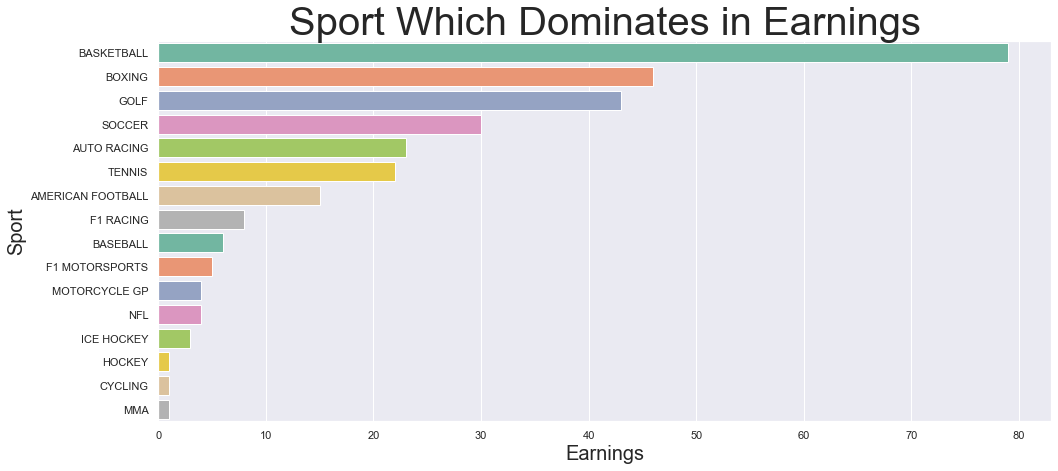

In [43]:
# Sport which dominates in earnings¶

# grapgh of count to the sports of Top_paid_year

top_sport=df['Sport'].value_counts()
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(16,7))
g=snr.barplot(x=top_sport,y=top_sport.index,palette='Set2')
g.set_title('Sport Which Dominates in Earnings',fontsize=40)
g.set_xlabel("Earnings",fontsize=20)
g.set_ylabel("Sport",fontsize=20)

Text(0, 0.5, 'Country')

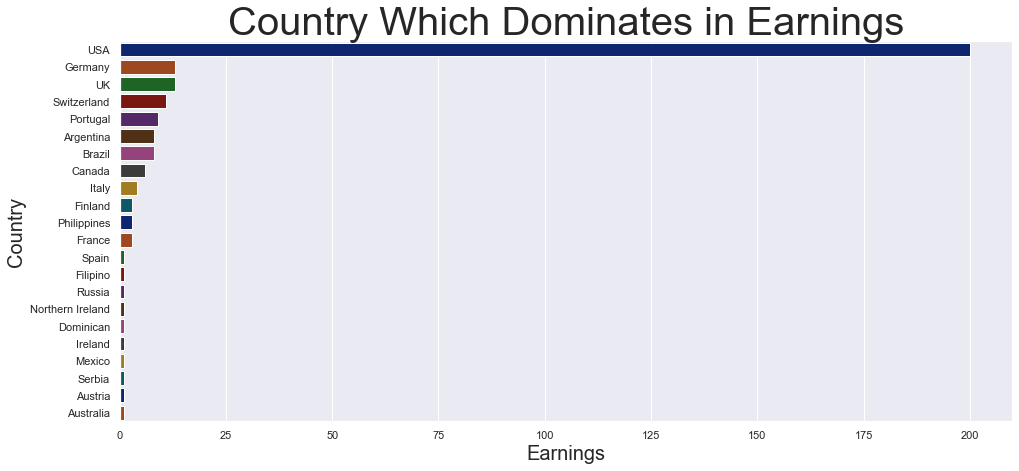

In [44]:
# Country which dominates in Sports earnings

all_country=df['Nationality'].value_counts()
fig, ax=plt.subplots(nrows=1, ncols=1,figsize=(16,7))
g=snr.barplot(x=all_country,y=all_country.index,palette='dark')
g.set_title('Country Which Dominates in Earnings',fontsize=40)
g.set_xlabel("Earnings",fontsize=20)
g.set_ylabel("Country",fontsize=20)

# Running Bar Graph for Highest Earners from 1990 to 2019

In [47]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [53]:
# we will use data file for this graph
df=pd.read_csv('./players.csv')
data=pd.read_csv('./players.csv',usecols=['Name','Sport','Year','earnings ($ million)'])
data.head(3)

,Name,Sport,Year,earnings ($ million)
0,Mike Tyson,boxing,1990,28.6
1,Buster Douglas,boxing,1990,26.0
2,Sugar Ray Leonard,boxing,1990,13.0


C:\Users\ajink\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



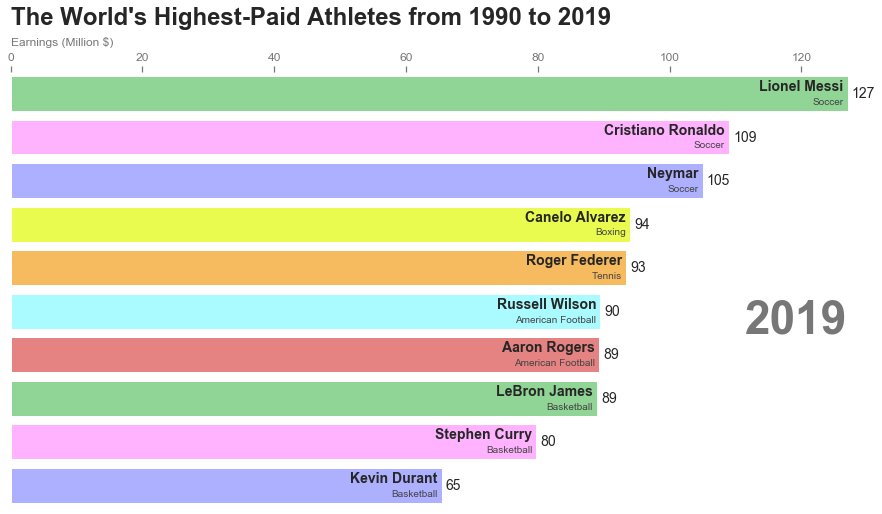

In [54]:

data = df[['Name','Sport','Year','earnings ($ million)']]
data.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = df.set_index('Name')['Sport'].to_dict()

colors = ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]


fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = data[data['Year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'],color=colors)
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings (Million $)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, "The World's Highest-Paid Athletes from 1990 to 2019",
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')
    plt.box(False)
    
draw_barchart(2019)

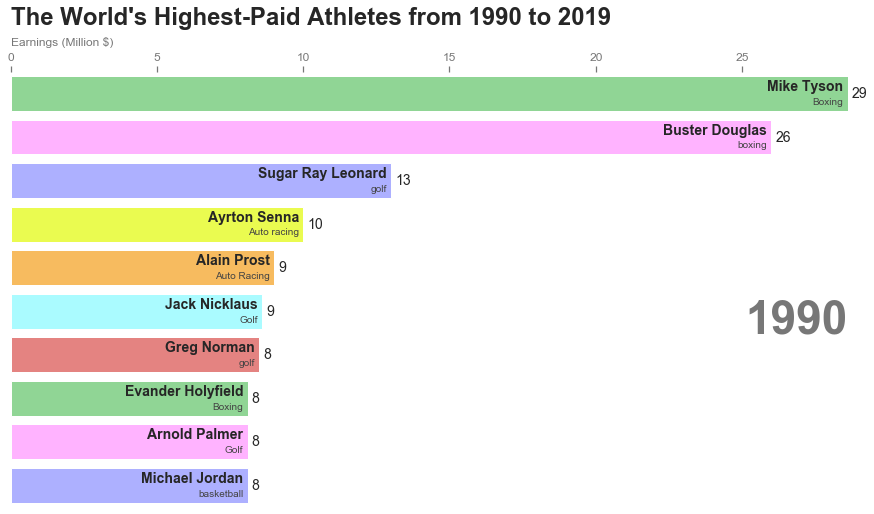

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2020))
HTML(animator.to_jshtml())

Credit for the code : @pratapvardhan; credit @jburnmurdoch and @parulpandey. Also refer to folowing github code Bar Chart Race in Python with Matplotlib by Pratap Vardhan for a step by step process to recreate it.

https://github.com/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb